<a href="https://colab.research.google.com/github/Lipeya/Violoence_Classify_using_Bert/blob/main/%ED%8F%AD%EB%A0%A5%EC%84%B1_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#드라이브 마운트


In [ ]:
#google drive 연동
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [ ]:
!pip install -q tf-models-official==2.4.0
!pip install transformers

     |████████████████████████████████| 1.1 MB 5.0 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 
     |████████████████████████████████| 352 kB 54.2 MB/s 
     |████████████████████████████████| 1.1 MB 45.9 MB/s 
     |████████████████████████████████| 596 kB 66.8 MB/s 
     |████████████████████████████████| 47.8 MB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 60.4 MB/s 
     |████████████████████████████████| 99 kB 11.9 MB/s 
     |████████████████████████████████| 237 kB 60.8 MB/s 
     |████████████████████████████████| 462 kB 68.2 MB/s 
     |████████████████████████████████| 4.2 MB 5.0 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 6.6 MB 64.0 MB/s 


In [ ]:
from transformers import TFBertModel, BertTokenizer
from transformers import TFBertForMaskedLM
from transformers import AutoTokenizer
bert_layer = TFBertModel.from_pretrained('klue/bert-base', from_pt=True)
bert_tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['bert.embeddings.position_ids', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# data 처리


In [ ]:
data = pd.read_csv("/content/mnt/MyDrive/project/syllable.csv",encoding="utf-8")

In [ ]:
corpus1 = pd.read_csv('/content/mnt/MyDrive/to.csv')
corpus1 = corpus1.iloc[:27292,1:]
corpus1.head()

,Sentence #,Word,Tag
0,Sentence: 1,미,O
1,Sentence: 1,국,O
2,Sentence: 1,입,O
3,Sentence: 1,장,O
4,Sentence: 1,에,O


In [ ]:
corpus2 = pd.read_csv('/content/mnt/MyDrive/umzulch.csv')
corpus2 = corpus2.iloc[:,1:]
corpus2.head()

,Sentence #,Word,Tag
0,Sentence: 2001,불,O
1,Sentence: 2001,매,O
2,Sentence: 2001,불,O
3,Sentence: 2001,타,O
4,Sentence: 2001,는,O


In [ ]:
umzul = corpus1.append(corpus2)
umzul = umzul.reset_index(drop = True)
display(umzul)

,Sentence #,Word,Tag
0,Sentence: 1,미,O
1,Sentence: 1,국,O
2,Sentence: 1,입,O
3,Sentence: 1,장,O
4,Sentence: 1,에,O
...,...,...,...
53370,Sentence: 3000,만,O
53371,Sentence: 3000,더,O
53372,Sentence: 3000,잘,O
53373,Sentence: 3000,된,O


In [ ]:
umzul.to_csv("/content/mnt/MyDrive/project/syllable.csv", mode='wt', encoding = 'utf-8-sig')

In [ ]:
data = umzul

In [ ]:
data[:11]

,Unnamed: 0,Sentence #,Word,Tag
0,0,Sentence: 1,미,O
1,1,Sentence: 1,국,O
2,2,Sentence: 1,입,O
3,3,Sentence: 1,장,O
4,4,Sentence: 1,에,O
5,5,Sentence: 1,서,O
6,6,Sentence: 1,는,O
7,7,Sentence: 1,영,O
8,8,Sentence: 1,웅,O
9,9,Sentence: 1,아,O


In [ ]:
data = data.fillna(method="ffill")
print(data.tail())

       Unnamed: 0      Sentence # Word Tag
53370       53370  Sentence: 3000    만   O
53371       53371  Sentence: 3000    더   O
53372       53372  Sentence: 3000    잘   O
53373       53373  Sentence: 3000    된   O
53374       53374  Sentence: 3000    다   O


# 전처리


In [ ]:
data['Word'] = data['Word'].str.lower()
print('Word 열의 중복을 제거한 값의 개수 : {}'.format(data.Word.nunique()))

Word 열의 중복을 제거한 값의 개수 : 1133


In [ ]:
func = lambda temp: [(w, t) for w, t in zip(temp["Word"].values.tolist(), temp["Tag"].values.tolist())]
tagged_sentences=[t for t in data.groupby("Sentence #").apply(func)]
print("전체 샘플 개수: {}".format(len(tagged_sentences)))

전체 샘플 개수: 2032


In [ ]:
print(tagged_sentences[:10])

[[('미', 'O'), ('국', 'O'), ('입', 'O'), ('장', 'O'), ('에', 'O'), ('서', 'O'), ('는', 'O'), ('영', 'O'), ('웅', 'O'), ('아', 'O'), ('니', 'O'), ('노', 'B')], [('여', 'O'), ('러', 'O'), ('분', 'O'), ('예', 'O'), ('수', 'O'), ('그', 'O'), ('리', 'O'), ('스', 'O'), ('도', 'O'), ('께', 'O'), ('서', 'O'), ('십', 'O'), ('자', 'O'), ('가', 'O'), ('에', 'O'), ('못', 'O'), ('박', 'O'), ('혀', 'O'), ('죽', 'O'), ('으', 'O'), ('셔', 'O'), ('서', 'O'), ('우', 'O'), ('리', 'O'), ('의', 'O'), ('죄', 'O'), ('를', 'O'), ('사', 'O'), ('하', 'O'), ('여', 'O'), ('주', 'O'), ('시', 'O'), ('고', 'O'), ('사', 'O'), ('흘', 'O'), ('만', 'O'), ('에', 'O'), ('부', 'O'), ('활', 'O'), ('하', 'O'), ('셔', 'O'), ('서', 'O'), ('우', 'O'), ('리', 'O'), ('가', 'O'), ('구', 'O'), ('원', 'O'), ('받', 'O'), ('을', 'O'), ('수', 'O'), ('있', 'O'), ('게', 'O'), ('하', 'O'), ('셨', 'O'), ('습', 'O'), ('니', 'O'), ('다', 'O'), ('아', 'O'), ('멘', 'O'), ('회', 'O'), ('개', 'O'), ('하', 'O'), ('라', 'O'), ('천', 'O'), ('국', 'O'), ('이', 'O'), ('가', 'O'), ('까', 'O'), ('이', 'O'), ('왔', 'O'), ('느', 'O'), 

In [ ]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 47,959개의 문장 샘플을 1개씩 불러온다.

    # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentence, tag_info = zip(*tagged_sentence) 
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다

In [ ]:
print(sentences[:5])
print(ner_tags[:5])

[['미', '국', '입', '장', '에', '서', '는', '영', '웅', '아', '니', '노'], ['여', '러', '분', '예', '수', '그', '리', '스', '도', '께', '서', '십', '자', '가', '에', '못', '박', '혀', '죽', '으', '셔', '서', '우', '리', '의', '죄', '를', '사', '하', '여', '주', '시', '고', '사', '흘', '만', '에', '부', '활', '하', '셔', '서', '우', '리', '가', '구', '원', '받', '을', '수', '있', '게', '하', '셨', '습', '니', '다', '아', '멘', '회', '개', '하', '라', '천', '국', '이', '가', '까', '이', '왔', '느', '니', '라'], ['뭐', '라', '는', '거', '야'], ['이', '건', '씹', '억', '까', '임', 'ㅋ', 'ㅋ', 'ㅋ', '지', '쪼', '개', '는', '코', '드', '가', '이', '상', '해', '서', '웃', '질', '못', '한', '거', '지', '길', '이', '결', '국', '캐', '리', '하', '는', '회', '차', '는', '점', '점', '늘', '어', '났', '음'], ['ㄴ', '이', '게', '맞', '다']]
[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

샘플의 최대 길이 : 359
샘플의 평균 길이 : 26.267224


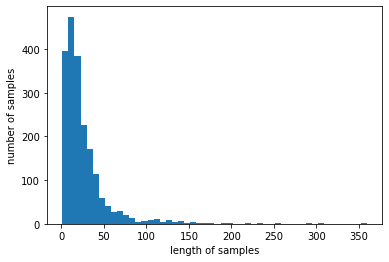

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
tar_tokenizer = Tokenizer(lower=False)

tar_tokenizer.fit_on_texts(ner_tags)

In [ ]:
words = np.array(data['Word'])
display(words)

array(['미', '국', '입', ..., '잘', '된', '다'], dtype=object)

In [ ]:
for word in words:
  bert_tokenizer.add_tokens(word)

In [ ]:
print(len(bert_tokenizer))

32101


In [ ]:
bert_layer.resize_token_embeddings(len(bert_tokenizer)) 

In [ ]:
bert_tokenizer.encode('좆')

[2, 32000, 3]

In [ ]:
def bert_encode(data, max_len) :
    input_ids = [] 
    attention_masks = []

    for text in data:
      input_id = []
      attention_mask = []
      input_id.append(2)
      attention_mask.append(1)
      for word in text:
        if len(input_id) >= max_len -1:
          break
        encoded = bert_tokenizer.encode(word, add_special_tokens = False)
        input_id.append(encoded[0])
        attention_mask.append(1)
      input_id.append(3)
      attention_mask.append(1)
      while len(input_id) <max_len:
        input_id.append(0)
        attention_mask.append(0)

      input_ids.append(input_id)
      attention_masks.append(attention_mask)


    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = bert_encode(sentences,100)

In [ ]:
print(bert_tokenizer.decode(train_input_ids[0]))


[CLS] 미 국 입 장 에 서 는 영 웅 아 니 노 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
set(data['Tag'])

{'B', 'I', 'O'}

In [ ]:
print(ner_tags)

[['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O',

In [ ]:
def bert_ner_encode(data, max_len) :
    input_ids = [] 

    for text in data:
      input_id = []

      input_id.append(0)
      for word in text:
        if len(input_id) >= max_len -1:
          break
        if word== 'O':
          input_id.append(1)
          continue
        if word == 'B':
          input_id.append(2)
          continue
        if word == 'I':
          input_id.append(3)
          continue
      input_id.append(0)
      while len(input_id) <max_len:
        input_id.append(0)

      input_ids.append(input_id)


    return np.array(input_ids)

In [ ]:
y_data = bert_ner_encode(ner_tags,100)

In [ ]:
print(y_data[0])

[0 1 1 1 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

print(index_to_ner)

{1: 'O', 2: 'B', 3: 'I', 0: 'PAD'}


In [ ]:
train_input_ids, test_input_ids, train_attention_masks,test_attention_masks, y_train_int, y_test_int = train_test_split(train_input_ids,train_attention_masks, y_data, test_size=.2, random_state=777)

In [ ]:
print(bert_tokenizer.decode(train_input_ids[0]))
print(train_input_ids[0])
print(y_train_int[0])

[CLS] 빨 리 정 권 바 껴 서 민 좆 당 새 끼 들 짱 깨 한 테 뒷 돈 받 아 쳐 먹 은 거 알 려 져 야 된 다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[    2  1199  1028  1543   627  1118   674  1258  1109 32000   821  1244
   712   882  1602   662  1891  1785   874   850  1122  1376  1661  1059
  1497   568  1381   981  1550  1396   860   809     3     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0 

In [ ]:
y_train = to_categorical(y_train_int, num_classes=4)
y_test = to_categorical(y_test_int, num_classes=4)

In [ ]:
print(y_train[0])

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0.

In [ ]:
set(y_train_int[0])

{0, 1, 2, 3}

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(train_input_ids.shape))
print('테스트 샘플 문장의 크기 : {}'.format(test_input_ids.shape))
print('훈련 샘플 문장의 크기 : {}'.format(train_attention_masks.shape))
print('테스트 샘플 문장의 크기 : {}'.format(test_attention_masks.shape))
print(y_train_int.shape)
print(y_test_int.shape)
# print('훈련 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_train_int.shape))
# print('훈련 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_train.shape))
# print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
# print('테스트 샘플 레이블(정수 인코딩)의 크기 : {}'.format(y_test_int.shape))
# print('테스트 샘플 레이블(원-핫 인코딩)의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (1625, 100)
테스트 샘플 문장의 크기 : (407, 100)
훈련 샘플 문장의 크기 : (1625, 100)
테스트 샘플 문장의 크기 : (407, 100)
(1625, 100)
(407, 100)


# bert


In [ ]:
import re
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, InputLayer, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

embedding_dim = 128
hidden_units = 256

input_ids = tf.keras.Input(shape=(100,),dtype='int32',name='input_ids')
attention_masks = tf.keras.Input(shape=(100,),dtype='int32',name='attention_masks')

output = bert_layer([input_ids,attention_masks])
net = output['last_hidden_state']

net = tf.keras.layers.Dense(128,activation='relu')(net)
net = tf.keras.layers.Dropout(0.2)(net)

net = tf.keras.layers.Dense(8,activation='relu')(net)
net = tf.keras.layers.Dropout(0.2)(net)
net = tf.keras.layers.Dense(4,activation='softmax')(net)
outputs = net

model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
output

TFBaseModelOutputWithPoolingAndCrossAttentions([('last_hidden_state',
                                                 <KerasTensor: shape=(None, 100, 768) dtype=float32 (created by layer 'tf_bert_model')>),
                                                ('pooler_output',
                                                 <KerasTensor: shape=(None, 768) dtype=float32 (created by layer 'tf_bert_model')>)])

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  110694912   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                         

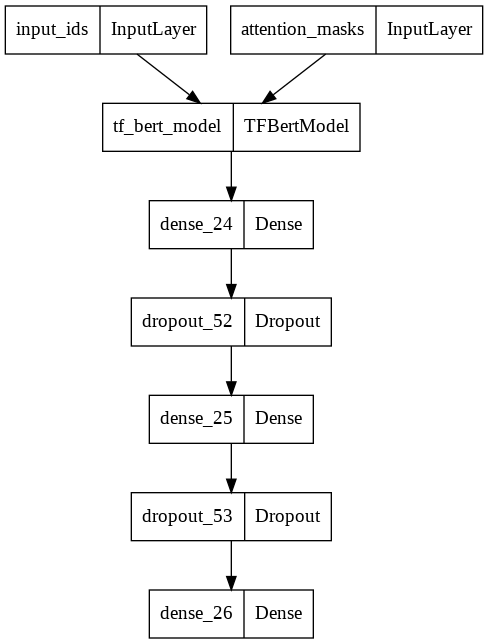

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
history = model.fit(
    [train_input_ids, train_attention_masks],
    y_train,
    validation_split=0.2, 
    epochs=5,
    batch_size=32)

Epoch 1/5
41/41 [==============================] - 29s 700ms/step - loss: 0.0975 - accuracy: 0.9622 - val_loss: 0.0466 - val_accuracy: 0.9854
Epoch 2/5
41/41 [==============================] - 28s 690ms/step - loss: 0.0860 - accuracy: 0.9645 - val_loss: 0.0422 - val_accuracy: 0.9874
Epoch 3/5
41/41 [==============================] - 28s 688ms/step - loss: 0.0808 - accuracy: 0.9654 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 4/5
41/41 [==============================] - 28s 690ms/step - loss: 0.0735 - accuracy: 0.9667 - val_loss: 0.0351 - val_accuracy: 0.9896
Epoch 5/5
41/41 [==============================] - 28s 690ms/step - loss: 0.0681 - accuracy: 0.9686 - val_loss: 0.0379 - val_accuracy: 0.9862


In [ ]:
i = 91 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict([test_input_ids[i], test_attention_masks[i]]) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 확률 벡터를 정수 인코딩으로 변경함.
labels = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_train[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))


# for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
#   if word!= 0:
#     if index_to_ner[pred] != 'O':
#       print('*' * len(index_to_word[word]))
#     else:
#       print(index_to_word[word])

NameError: ignored

# f1 score


In [ ]:
!pip install seqeval

In [ ]:
from seqeval.metrics import f1_score, classification_report

def sequences_to_tag(sequences):
    result = []
    # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
    for sequence in sequences:
        word_sequence = []
        # 시퀀스로부터 확률 벡터 또는 원-핫 벡터를 하나씩 꺼낸다.
        for pred in sequence:
            # 정수로 변환. 예를 들어 pred가 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            pred_index = np.argmax(pred)            
            # index_to_ner을 사용하여 정수를 태깅 정보로 변환. 'PAD'는 'O'로 변경.
            word_sequence.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(word_sequence)
    return result

y_predicted = model.predict([test_input_ids, test_attention_masks])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)


print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 49.8%
              precision    recall  f1-score   support

           _       0.42      0.62      0.50       302

   micro avg       0.42      0.62      0.50       302
   macro avg       0.42      0.62      0.50       302
weighted avg       0.42      0.62      0.50       302



In [ ]:
idx = 345
print(bert_tokenizer.decode(test_input_ids[idx]))
print(test_input_ids[idx])
print(pred_tags[idx])
print(test_tags[idx])

[CLS] 이 제 게 이 트 볼 치 노 ㅋ ㅋ ㅋ [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[   2 1504 1545  578 1504 1812 1164 1689  766  191  191  191    3    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   

In [ ]:
len(test_tags[0])

100

# CRF


In [ ]:
!pip install keras_crf

In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Bidirectional, TimeDistributed, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_crf import CRFModel
from tensorflow_addons.layers import CRF
from seqeval.metrics import f1_score, classification_report

embedding_dim = 128
hidden_units = 64
dropout_ratio = 0.3


input_ids = tf.keras.Input(shape=(100,),dtype='int32',name='input_ids')
attention_masks = tf.keras.Input(shape=(100,),dtype='int32',name='attention_masks')

output = bert_layer([input_ids,attention_masks])
net = output['last_hidden_state']

# net = tf.keras.layers.Dense(128,activation='relu')(net)
# net = tf.keras.layers.Dropout(0.2)(net)

net = tf.keras.layers.Dense(8,activation='relu')(net)
net = tf.keras.layers.Dropout(0.2)(net)
net = tf.keras.layers.Dense(4,activation='softmax')(net)


crf_layer = tfa.layers.CRF(4)

output = crf_layer(net)

model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = net)

# model = CRFModel(net, 4)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),loss='categorical_crossentropy' , metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
crf_layer.dtype

'float32'

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 100)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  110694912   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [ ]:
history = model.fit([train_input_ids, train_attention_masks],
                    y_train.reshape(y_train.shape[0], y_train.shape[1], 4), 
                    batch_size=32, 
                    epochs=5, 
                    validation_split=0.2)

Epoch 1/5
41/41 [==============================] - 46s 759ms/step - loss: 0.4811 - accuracy: 0.8379 - val_loss: 0.0461 - val_accuracy: 0.9910
Epoch 2/5
41/41 [==============================] - 28s 691ms/step - loss: 0.1687 - accuracy: 0.9348 - val_loss: 0.0457 - val_accuracy: 0.9918
Epoch 3/5
41/41 [==============================] - 28s 683ms/step - loss: 0.1478 - accuracy: 0.9361 - val_loss: 0.0480 - val_accuracy: 0.9922
Epoch 4/5
41/41 [==============================] - 28s 687ms/step - loss: 0.1408 - accuracy: 0.9359 - val_loss: 0.0435 - val_accuracy: 0.9918
Epoch 5/5
41/41 [==============================] - 28s 689ms/step - loss: 0.1350 - accuracy: 0.9368 - val_loss: 0.0460 - val_accuracy: 0.9915


In [ ]:
y_train.shape

(1625, 100, 4)

In [ ]:
model.load_weights('bilstm_crf/cp.ckpt')

i = 512 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_train[i]]))[0] # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
labels = np.argmax(y_train[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_train[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

NotFoundError: ignored

In [ ]:
y_predicted = model.predict(X_test)[0]

print(y_predicted[:2])

[[2 0 1 3 2 0 1 3 2 0 1 3 2 0 1 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0

In [ ]:
def sequences_to_tag_for_crf(sequences): 
    result = []
    # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
    for sequence in sequences: 
        word_sequence = []
        # 시퀀스로부터 예측 정수 레이블을 하나씩 꺼낸다.
        for pred in sequence:
            pred_index = np.argmax(pred)
            # index_to_ner을 사용하여 정수를 태깅 정보로 변환. 'PAD'는 'O'로 변경.
            word_sequence.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(word_sequence)
    return result

y_predicted = model.predict([test_input_ids, test_attention_masks])
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag_for_crf(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 64.3%
              precision    recall  f1-score   support

           _       0.59      0.71      0.64       302

   micro avg       0.59      0.71      0.64       302
   macro avg       0.59      0.71      0.64       302
weighted avg       0.59      0.71      0.64       302



In [ ]:
idx = 400
print(bert_tokenizer.decode(test_input_ids[idx]))
print(pred_tags[idx])
print(test_tags[idx])

[CLS] 룸 을 끊 었 습 니 다 ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ ㅋ [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

# char embedding


In [ ]:
# char_vocab 만들기
words = list(set(data["Word"].values))
chars = set([w_i for w in words for w_i in w])
chars = sorted(list(chars))
print('문자 집합 :',chars)


문자 집합 : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'ㄱ', 'ㄲ', 'ㄳ', 'ㄴ', 'ㄷ', 'ㄹ', 'ㅁ', 'ㅂ', 'ㅄ', 'ㅅ', 'ㅆ', 'ㅇ', 'ㅈ', 'ㅉ', 'ㅊ', 'ㅋ', 'ㅌ', 'ㅍ', 'ㅎ', 'ㅏ', 'ㅐ', 'ㅗ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', '가', '각', '간', '갇', '갈', '감', '갑', '값', '갓', '갔', '강', '갖', '같', '갚', '개', '객', '갤', '갱', '걍', '걑', '걔', '거', '걱', '건', '걸', '검', '겁', '것', '게', '겐', '겜', '겟', '겠', '겨', '격', '겪', '견', '결', '겸', '겹', '겻', '겼', '경', '계', '고', '곡', '곤', '곧', '골', '곱', '곳', '공', '과', '관', '광', '괘', '괴', '교', '구', '국', '군', '굳', '굴', '굵', '굿', '궁', '궈', '권', '궤', '귀', '귄', '규', '균', '그', '극', '근', '글', '긁', '금', '급', '긍', '기', '긴', '길', '김', '깊', '까', '깎', '깐', '깔', '깜', '깝', '깟', '깠', '깡', '깨', '깽', '꺄', '꺠', '꺼', '껀', '께', '껴', '꼇', '꼐', '꼬', '꼭', '꼰', '꼴', '꼽', '꽂', '꽃', '꽉', '꾸', '꾼', '꿀', '꿈', '꿔', '뀌', '뀐', '뀜', '끄', '끈', '끊', '끌', '끔', '끗', '끝', '끼', '낀', '낌', '나', '낙', '낚', '난', '날', '낡', '남', '낫', '났', '낭', '낮', '낯', '내', '낸', '냄', '냈', '냐', '냥', '냨', '너', '넌', '널', '넓', '넘', '넣', '네', '넥', '넷', '넼', '녀', '녁', '

In [ ]:
char_to_index = {c: i + 2 for i, c in enumerate(chars)}
char_to_index["OOV"] = 1
char_to_index["PAD"] = 0

index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [ ]:
sentences[0]

['미', '국', '입', '장', '에', '서', '는', '영', '웅', '아', '니', '노']

In [ ]:
max_len_char = 1

# 문자 시퀀스에 대한 패딩하는 함수
def padding_char_indice(char_indice, max_len_char):
  return pad_sequences(
        char_indice, maxlen=max_len_char, padding='post', value = 0)

# 각 단어를 문자 시퀀스로 변환 후 패딩 진행
def integer_coding(sentences):
  char_data = []
  for ts in sentences:
    # word_indice = [bert_tokenizer.encode(t, add_special_tokens = False)[0] for t in ts]
    char_indices = []
    for t in ts:
      char_indice = bert_tokenizer.encode(t, add_special_tokens = False)[0]  
      char_indices.append(char_indice)

      #char_indice = padding_char_indice(char_indice, max_len_char)

    # for chars_of_token in char_indice:
    #   if len(chars_of_token) > max_len_char:
    #     continue
    char_data.append(char_indices)
  return char_data

# 문자 단위 정수 인코딩 결과
X_char_data = integer_coding(sentences)

In [ ]:
# 문자 단위 정수 인코딩
print('문자 단위 정수 인코딩 :')
print(X_char_data[0])
print(sentences[0])
print(bert_tokenizer.decode(X_char_data[0]))
print(train_input_ids[0])

문자 단위 정수 인코딩 :
[1107, 616, 1511, 1526, 1421, 1258, 793, 1437, 1475, 1376, 801, 766]
['미', '국', '입', '장', '에', '서', '는', '영', '웅', '아', '니', '노']
미 국 입 장 에 서 는 영 웅 아 니 노
[[    2]
 [ 1199]
 [ 1028]
 [ 1543]
 [  627]
 [ 1118]
 [  674]
 [ 1258]
 [ 1109]
 [32000]
 [  821]
 [ 1244]
 [  712]
 [  882]
 [ 1602]
 [  662]
 [ 1891]
 [ 1785]
 [  874]
 [  850]
 [ 1122]
 [ 1376]
 [ 1661]
 [ 1059]
 [ 1497]
 [  568]
 [ 1381]
 [  981]
 [ 1550]
 [ 1396]
 [  860]
 [  809]
 [    3]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [    0]
 [ 

In [ ]:
X_char_data = pad_sequences(X_char_data, maxlen=max_len, padding='post', value = 0)

In [ ]:
X_char_train, X_char_test, _, _ = train_test_split(X_char_data, y_data, test_size=.2, random_state=777)

X_char_train = np.array(X_char_train)
X_char_test = np.array(X_char_test)

In [ ]:
print(X_train[0])

print(index_to_word[150])

print(' '.join([index_to_char[index] for index in X_char_train[0][0]]))

[224 225 171  24 182   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
'
머 PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD


In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('훈련 샘플 char 데이터의 크기 : {}'.format(X_char_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (400, 104)
훈련 샘플 레이블의 크기 : (400, 104, 4)
훈련 샘플 char 데이터의 크기 : (400, 104, 15)
테스트 샘플 문장의 크기 : (100, 104)
테스트 샘플 레이블의 크기 : (100, 104, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, TimeDistributed, Dropout, concatenate, Bidirectional, LSTM, Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras import Model
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from seqeval.metrics import f1_score, classification_report
from keras_crf import CRFModel

embedding_dim = 128
char_embedding_dim = 64
dropout_ratio = 0.5
hidden_units = 256
num_filters = 30
kernel_size = 3


#bert
input_ids = tf.keras.Input(shape=(100,),dtype='int32',name='input_ids')
attention_masks = tf.keras.Input(shape=(100,),dtype='int32',name='attention_masks')

output = bert_layer([input_ids,attention_masks])
net = output['last_hidden_state']

net = tf.keras.layers.Dense(8,activation='relu')(net)
net = tf.keras.layers.Dropout(0.2)(net)
bert_outputs = tf.keras.layers.Dense(4,activation='softmax')(net)

# char 임베딩
char_ids = tf.keras.Input(shape=(None,1),dtype='int32',name='char_ids')
embed_char_out = TimeDistributed(Embedding(100, char_embedding_dim, embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), name='char_embedding')(char_ids)
dropout = Dropout(dropout_ratio)(embed_char_out)

# char 임베딩에 대해서는 Conv1D 수행
conv1d_out = TimeDistributed(Conv1D(kernel_size=kernel_size, filters=num_filters, padding='same', activation='tanh', strides=1))(dropout)
maxpool_out = TimeDistributed(MaxPooling1D(1))(conv1d_out)
char_embeddings = TimeDistributed(Flatten())(maxpool_out)
char_embeddings = Dropout(dropout_ratio)(char_embeddings)
char_embeddings = tf.keras.layers.Dense(4,activation='softmax')(char_embeddings)
# char 임베딩을 Conv1D 수행한 뒤에 단어 임베딩과 연결
output = concatenate([bert_outputs, char_embeddings])

# # 연결한 벡터를 가지고 문장의 길이만큼 LSTM을 수행
# output = Bidirectional(LSTM(hidden_units, return_sequences=True, dropout=dropout_ratio))(output)

# 출력층
#output = TimeDistributed(Dense(tag_size, activation='softmax'))(output)



crf_layer = tfa.layers.CRF(4)

output = crf_layer(output)

model = tf.keras.models.Model(inputs = [input_ids,attention_masks,char_ids],outputs = output)


model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_ids (InputLayer)          [(None, None, 1)]    0           []                               
                                                                                                  
 char_embedding (TimeDistribute  (None, None, 1, 64)  72512      ['char_ids[0][0]']               
 d)                                                                                               
                                                                                                  
 dropout_76 (Dropout)           (None, None, 1, 64)  0           ['char_embedding[0][0]']         
                                                                                                  
 input_ids (InputLayer)         [(None, 100)]        0           []                        

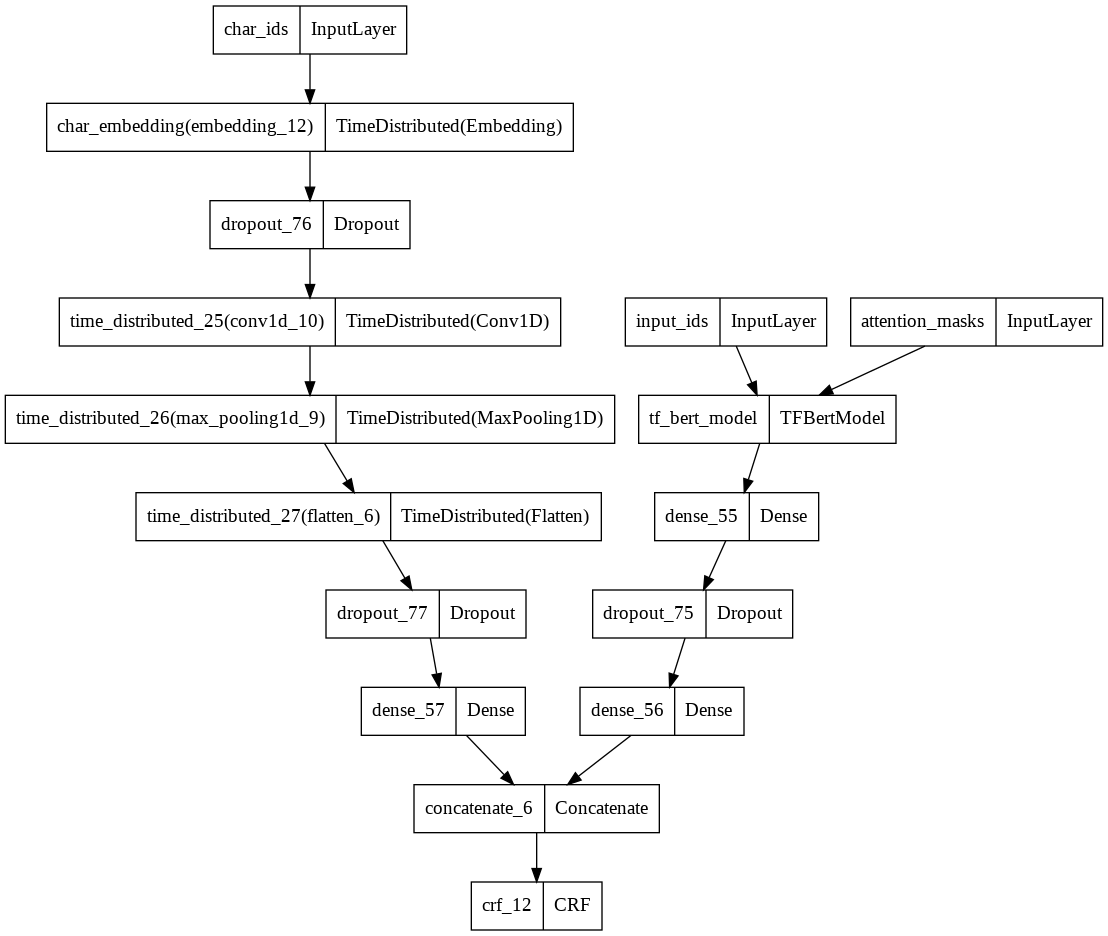

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
# mc = ModelCheckpoint('bilstm_cnn.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit([train_input_ids, train_attention_masks, train_input_ids], 
                    y_train.reshape(y_train.shape[0], y_train.shape[1], 4), 
                    batch_size=32, 
                    epochs=15, 
                    validation_split=0.2, 
                    verbose=1) 
                    #callbacks=[es, mc])

Epoch 1/15


TypeError: ignored

In [ ]:
y_train.reshape(y_train.shape[0], y_train.shape[1], 4)

array([[[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       ...,

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]],

       [[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [1., 0., 0., 0.],
        [1., 0.

In [ ]:
model = load_model('bilstm_cnn.h5')

i = 395 # 확인하고 싶은 테스트용 샘플의 인덱스.
# 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = model.predict([np.array([X_train[i]]), np.array([X_char_train[i]])])
y_predicted = np.argmax(y_predicted, axis=-1) # 확률 벡터를 정수 인코딩으로 변경.
labels = np.argmax(y_train[i], -1) # 원-핫 인코딩을 정수 인코딩으로 변경.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_train[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))


단어             |실제값  |예측값
-----------------------------------
스                : O       O
벅                : O       O
은                : O       O
못                : O       O
참                : O       O
지                : O       O
ㅋㅋ               : O       O
ㅋㅋ               : O       O


In [ ]:
y_predicted = model.predict([X_test, X_char_test])
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 0.0%
              precision    recall  f1-score   support

           _       0.00      0.00      0.00        61

   micro avg       0.00      0.00      0.00        61
   macro avg       0.00      0.00      0.00        61
weighted avg       0.00      0.00      0.00        61



/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
embedding_dim = 128
char_embedding_dim = 64
dropout_ratio = 0.5
hidden_units = 256
num_filters = 30
kernel_size = 3

# 단어 임베딩
word_ids = Input(shape=(None,),dtype='int32', name='words_input')
word_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(word_ids)

# char 임베딩
char_ids = Input(shape=(None, max_len_char,), name='char_input')
embed_char_out = TimeDistributed(Embedding(len(char_to_index), char_embedding_dim, embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), name='char_embedding')(char_ids)
dropout = Dropout(dropout_ratio)(embed_char_out)

# char 임베딩에 대해서는 Conv1D 수행
conv1d_out = TimeDistributed(Conv1D(kernel_size=kernel_size, filters=num_filters, padding='same',activation='tanh', strides=1))(dropout)
maxpool_out=TimeDistributed(MaxPooling1D(max_len_char))(conv1d_out)
char_embeddings = TimeDistributed(Flatten())(maxpool_out)
char_embeddings = Dropout(dropout_ratio)(char_embeddings)

# char 임베딩을 Conv1D 수행한 뒤에 단어 임베딩과 연결
output = concatenate([word_embeddings, char_embeddings])

# 연결한 벡터를 가지고 문장의 길이만큼 LSTM을 수행
output = Bidirectional(LSTM(hidden_units, return_sequences=True, dropout=dropout_ratio))(output)

# 출력층
output = TimeDistributed(Dense(tag_size, activation='relu'))(output)

base = Model(inputs=[word_ids, char_ids], outputs=[output])
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_cnn_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

In [ ]:
history = model.fit([X_train, X_char_train], y_train_int, batch_size=128, epochs=10, validation_split=0.1, callbacks=[mc, es])

Epoch 1/10
11/11 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.7386 - loss: 65.7504
Epoch 1: val_decode_sequence_accuracy improved from -inf to 0.76776, saving model to bilstm_cnn_crf/cp.ckpt
11/11 [==============================] - 9s 306ms/step - decode_sequence_accuracy: 0.7386 - loss: 63.8874 - val_decode_sequence_accuracy: 0.7678 - val_loss: 36.8023
Epoch 2/10
11/11 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.7639 - loss: 28.2953
Epoch 2: val_decode_sequence_accuracy improved from 0.76776 to 0.76825, saving model to bilstm_cnn_crf/cp.ckpt
11/11 [==============================] - 2s 180ms/step - decode_sequence_accuracy: 0.7639 - loss: 27.2301 - val_decode_sequence_accuracy: 0.7683 - val_loss: 18.1175
Epoch 3/10
11/11 [==============================] - ETA: 0s - decode_sequence_accuracy: 0.7639 - loss: 19.7103
Epoch 3: val_decode_sequence_accuracy improved from 0.76825 to 0.77976, saving model to bilstm_cnn_crf/cp.ckpt
11/11 [

In [ ]:
model.load_weights('bilstm_cnn_crf/cp.ckpt')

i = 76 # 확인하고 싶은 테스트용 샘플의 인덱스.
# 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = model.predict([np.array([X_test[i]]), np.array([X_char_test[i]])])[0] 
labels = np.argmax(y_test[i], -1) # 원-핫 벡터를 정수 인코딩으로 변경.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
유식               : O       O
이                : O       O
형                : O       O
틀딱               : B       O
다                : O       O
됬                : O       O
노                : B       O
ㅜㅜ               : O       O
게이트              : O       O
불                : O       O
ㅋㅋㅋ              : O       O
ㅋㅋ               : O       O
ㅋㅋ               : O       O


In [ ]:
y_predicted = model.predict([X_test, X_char_test])[0]
pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

F1-score: 0.0%
              precision    recall  f1-score   support

           _       0.00      0.00      0.00       333

   micro avg       0.00      0.00      0.00       333
   macro avg       0.00      0.00      0.00       333
weighted avg       0.00      0.00      0.00       333



/usr/local/lib/python3.7/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# lstm


In [ ]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical

# 데이터 로드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()
    

In [ ]:
total_data = ' '.join(sentences)
print('문자열의 길이 또는 총 문자의 개수: %d' % len(total_data))

In [ ]:
print(total_data[:500])

In [ ]:
import re


total_data = re.sub(r'[^0-9a-zA-Z ]', '', total_data)

In [ ]:
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문자 집합의 크기 : {}'.format(vocab_size))

문자 집합의 크기 : 37


In [ ]:
# 문자에 고유한 정수 부여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
print('문자 집합 :',char_to_index)

In [ ]:
index_to_char = {}
for key, value in char_to_index.items():
    index_to_char[value] = key

In [ ]:
seq_length = 60

# 문자열의 길이를 seq_length로 나누면 전처리 후 생겨날 샘플 수
n_samples = int(np.floor((len(total_data) - 1) / seq_length))
print ('샘플의 수 : {}'.format(n_samples))

샘플의 수 : 2560


In [ ]:
train_X = []
train_y = []

for i in range(n_samples):
    # 0:60 -> 60:120 -> 120:180로 loop를 돌면서 문장 샘플을 1개씩 pick.
    X_sample = total_data[i * seq_length: (i + 1) * seq_length]

    # 정수 인코딩
    X_encoded = [char_to_index[c] for c in X_sample]
    train_X.append(X_encoded)

    # 오른쪽으로 1칸 쉬프트
    y_sample = total_data[i * seq_length + 1: (i + 1) * seq_length + 1]
    y_encoded = [char_to_index[c] for c in y_sample]
    train_y.append(y_encoded)

In [ ]:
print('X 데이터의 첫번째 샘플 :',train_X[0])
print('y 데이터의 첫번째 샘플 :',train_y[0])
print('-'*50)
print('X 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_X[0]])
print('y 데이터의 첫번째 샘플 디코딩 :',[index_to_char[i] for i in train_y[0]])

In [ ]:
length = 11
sequences = []
for i in range(length, len(total_data)):
    seq = total_data[i-length:i] # 길이 11의 문자열을 지속적으로 만든다.
    sequences.append(seq)
print('총 훈련 샘플의 수: %d' % len(sequences))

총 훈련 샘플의 수: 153634


In [ ]:
sequences[:10]

['the project',
 'he project ',
 'e project g',
 ' project gu',
 'project gut',
 'roject gute',
 'oject guten',
 'ject gutenb',
 'ect gutenbe',
 'ct gutenber']

In [ ]:
encoded_sequences = []
for sequence in sequences: # 전체 데이터에서 문장 샘플을 1개씩 꺼낸다.
    encoded_sequence = [char_to_index[char] for char in sequence] # 문장 샘플에서 각 문자에 대해서 정수 인코딩을 수행.
    encoded_sequences.append(encoded_sequence)

In [ ]:
encoded_sequences = np.array(encoded_sequences)

# 맨 마지막 위치의 문자를 분리
X_data = encoded_sequences[:,:-1]
# 맨 마지막 위치의 문자를 저장
y_data = encoded_sequences[:,-1]

In [ ]:
# 원-핫 인코딩
X_data_one_hot = [to_categorical(encoded, num_classes=vocab_size) for encoded in X_data]
X_data_one_hot = np.array(X_data_one_hot)
y_data_one_hot = to_categorical(y_data, num_classes=vocab_size)

In [ ]:
print(X_data_one_hot.shape)

(153634, 10, 37)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

hidden_units = 64

model = Sequential()
model.add(LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2])))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
lstm_inputs = tf.keras.layers.Input(shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2]), dtype= 'float32', name='text')
lstm = LSTM(hidden_units, input_shape=(X_data_one_hot.shape[1], X_data_one_hot.shape[2]))(lstm_inputs)
lstm = Dense(vocab_size, activation='softmax')(lstm)

model = Model(inputs=[lstm_inputs], outputs=lstm)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(X_data_one_hot[1])
print(vocab_size)
x = tf.random.uniform(shape=(32, 25, 1))

lstm = LSTM(20, return_sequences=True, return_state=True)
output_c, _hidden, _state = lstm(x)

print(type(output_c))

output = concatenate([output_c, char_embeddings])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [ ]:
from operator import itemgetter

def next_prediction(model, char_to_index, seq_length, seed_text):
  encoded = [char_to_index[char] for char in seed_text] # 현재 시퀀스에 대한 정수 인코딩
  encoded = pad_sequences([encoded], maxlen=seq_length, padding='pre') # 데이터에 대한 패딩
  encoded = to_categorical(encoded, num_classes=len(char_to_index))

  result = model.predict(encoded,verbose =0)


 
  return result

In [ ]:
input_sentence = 'winter is comin'
res = next_prediction(model, char_to_index, 10, input_sentence)
print(type(res))

<class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Input, TimeDistributed, Dropout, concatenate, Bidirectional, LSTM, Conv1D, Dense, MaxPooling1D, Flatten
from tensorflow.keras import Model
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
#from seqeval.metrics import f1_score, classification_report
#from keras_crf import CRFModel

embedding_dim = 128
char_embedding_dim = 64
dropout_ratio = 0.5
hidden_units = 256
num_filters = 30
kernel_size = 3

# # 단어 임베딩
# word_ids = Input(shape=(None,),dtype='int32', name='words_input')
# print(type(word_ids))
# word_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(word_ids)

# char 임베딩

char_ids = Input(shape=(None, max_len_char,), name='char_input')
embed_char_out = TimeDistributed(Embedding(len(char_to_index), char_embedding_dim, embeddings_initializer=RandomUniform(minval=-0.5, maxval=0.5)), name='char_embedding')(char_ids)
dropout = Dropout(dropout_ratio)(embed_char_out)

# char 임베딩에 대해서는 Conv1D 수행

conv1d_out = TimeDistributed(Conv1D(kernel_size=kernel_size, filters=num_filters, padding='same', activation='tanh', strides=1))(dropout)
maxpool_out = TimeDistributed(MaxPooling1D(max_len_char))(conv1d_out)
char_embeddings = TimeDistributed(Flatten())(maxpool_out)
char_embeddings = Dropout(dropout_ratio)(char_embeddings)

model2 = Model(inputs = [char_ids], outputs = char_embeddings)

# # char 임베딩을 Conv1D 수행한 뒤에 단어 임베딩과 연결
model3 = Sequential()
model3.add(tf.keras.layers.concatenate([lstm, lstm]))

model_concat = concatenate([model.output, model2.output], axis=-1, inputs = [model.input, model2.input])
model_concat = Dense(1, activation='softmax')(model_concat)
model3 = Model(inputs=[model.input, model2.input], outputs=model_concat)
# # 연결한 벡터를 가지고 문장의 길이만큼 LSTM을 수행
model3.add(Bidirectional(LSTM(hidden_units, return_sequences=True, dropout=dropout_ratio)))
# print(type(output))
# # 출력층
model3.add(TimeDistributed(Dense(tag_size, activation='softmax')))
# print(type(output))


model3.compile(loss='categorical_crossentropy', optimizer='nadam',  metrics=['acc'])


TypeError: ignored

In [ ]:
print(model.output)
print(model2.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 37), dtype=tf.float32, name=None), name='dense_7/Softmax:0', description="created by layer 'dense_7'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 15, 30), dtype=tf.float32, name=None), name='time_distributed_43/Reshape_1:0', description="created by layer 'time_distributed_43'")


In [ ]:
!pip install -q -U tensorflow-text
!pip install -q tf-models-official

     |████████████████████████████████| 4.9 MB 5.1 MB/s 
     |████████████████████████████████| 462 kB 46.4 MB/s 
     |████████████████████████████████| 2.2 MB 5.4 MB/s 
     |████████████████████████████████| 1.2 MB 41.2 MB/s 
     |████████████████████████████████| 47.8 MB 54 kB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 237 kB 44.7 MB/s 
     |████████████████████████████████| 636 kB 47.5 MB/s 
     |████████████████████████████████| 90 kB 8.5 MB/s 
     |████████████████████████████████| 352 kB 49.4 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 99 kB 9.0 MB/s 


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

tfhub_handle_preprocess = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

bert_preprocess_model = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")

In [ ]:
tfhub_handle_encoder ="https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1"
bert_model = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
encoder_inputs = preprocessing_layer(text_input)
encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
outputs = encoder(encoder_inputs)
net = outputs['pooled_output']
net = tf.keras.layers.Dropout(0.2)(net)
net = tf.keras.layers.Dense(32, activation="softmax",name = 'output')(net)

bert_model = tf.keras.Model(text_input, net)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
bert_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                        loss=loss,
                         metrics=metrics)

In [ ]:
bert_model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                   

In [ ]:
from operator import itemgetter
result = bert_model.predict(["hello worl"])
result = [(index_to_char[i],val) for i,val in enumerate(result[0])]
result = sorted(result, key = itemgetter(1), reverse=True)

print(result)

[('7', 0.13114057), ('a', 0.1040693), ('u', 0.06603183), (' ', 0.057351973), ('m', 0.047739215), ('l', 0.046275306), ('c', 0.04038621), ('4', 0.039039083), ('d', 0.033667184), ('i', 0.032181807), ('3', 0.03148138), ('g', 0.031473055), ('1', 0.031444598), ('t', 0.030050121), ('o', 0.027693387), ('s', 0.025450801), ('p', 0.024868198), ('j', 0.02478536), ('f', 0.020618007), ('n', 0.020327155), ('q', 0.017562857), ('5', 0.01647758), ('9', 0.015295273), ('2', 0.012644506), ('k', 0.012600965), ('8', 0.011026747), ('h', 0.010680642), ('e', 0.00949596), ('b', 0.009288463), ('6', 0.0074454574), ('r', 0.006132732), ('0', 0.0052742353)]
